# Inverstigation of EDP

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }<\style>"))

In [2]:
import datetime
print(datetime.datetime.now())

2018-11-22 15:26:17.972964


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [6]:
result_path = u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/hdf_married_couples/"

In [7]:
df = pd.read_hdf(result_path+"married_couples_step_2.h5", "fiscr")

In [8]:

#df_panact = pd.read_hdf(store_path, 'PANACT')
#df_panact_2005 = df_panact[df_panact.AN>=2005]
#df_panact_2005.to_hdf('C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/dads','start_2005' )

We define the taxable income (Revenu Brut Global) based on the 7 income categories present in the database.

In [9]:
df["Rbg_2011"] =(( df.ZTSAM_2011*0.9) + df.ZRAGM_2011 + df.ZRACM_2011 + df.ZRNCM_2011 + df.ZFONM_2011 + df.ZPERM_2011*0.9
                    + df.ZRICM_2011)
df["Rbg_2014"] =(( df.ZTSAM_2014*0.9) + df.ZRAGM_2014 + df.ZRACM_2014 + df.ZRNCM_2014 + df.ZFONM_2014 + df.ZPERM_2014*0.9
                    + df.ZRICM_2014)
df["Delta_Rbg"] = df.Rbg_2014 - df.Rbg_2011
df["Delta_rbg"] = df.Rbg_2014 - df.Rbg_2011
df["Delta_ZIMPOM"] = df.ZIMPOM_DECL_2014 - df.ZIMPOM_2011

In [10]:
household_income_vars = ["ZTSAM", "ZRAGM", "ZRACM","ZRNCM", "ZFONM", "ZPERM","ZRICM"]
for var in household_income_vars:
    df["Delta_{}".format(var)] = df["{}_2014".format(var)] - df["{}_2011".format(var)]

In [11]:
import importlib
year = 2014

ir_2014 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union")

ir_2011 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union_{}".format(2011))

In [12]:
dict_gain_ir_2011_by_child = dict()
dict_gain_ir_2014_by_child = dict()
for child in range(1,6):
    ir_x_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2011.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2011_by_child[child] = ir_0_children - ir_x_children 
    
    ir_x_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2014_by_child[child] = ir_0_children - ir_x_children 
    
    
    


#ir_2011.ir_avec_plafond_qf_enfant(pd.Series(range(0,2*10**5, 1000)), ir.parts_fiscales_enfants(pd.Series([3.0]*200).astype("float"))).plot()

In [13]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

(50000, 160000)

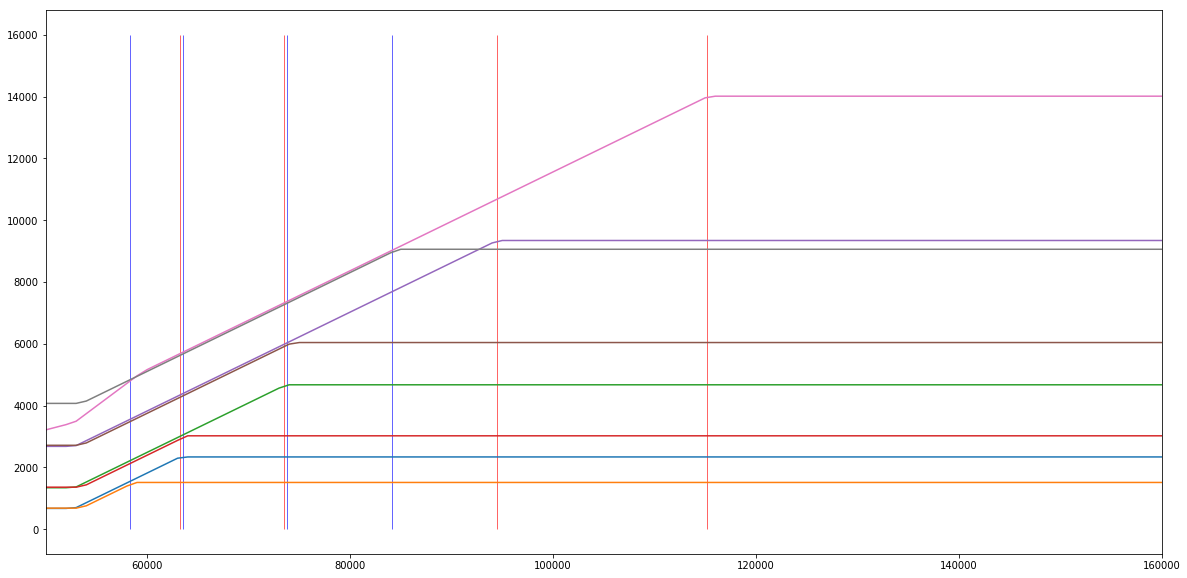

In [14]:



plt.figure(figsize=(20,10))
for child in range(1,5):
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2011_by_child[child])
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2014_by_child[child])
for thrsh in threshold_byr_rbg["2011"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "r")
for thrsh in threshold_byr_rbg["2014"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "b")
plt.xlim(50000,160000)

In [15]:
parts_fiscales_enfants = ir_2014.parts_fiscales_enfants(df.NBPAC_2011)

In [16]:
df["Irpp_2011"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, parts_fiscales_enfants)
df["Irpp_2014"] = ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, parts_fiscales_enfants)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in maximum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)


(361649, 253)


(0, 15000)

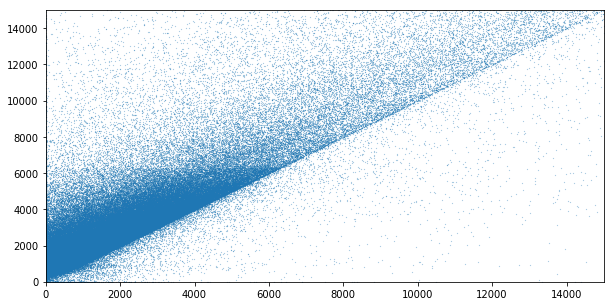

In [17]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_2011,df_temp.Irpp_2011, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(332051, 253)


(0, 15000)

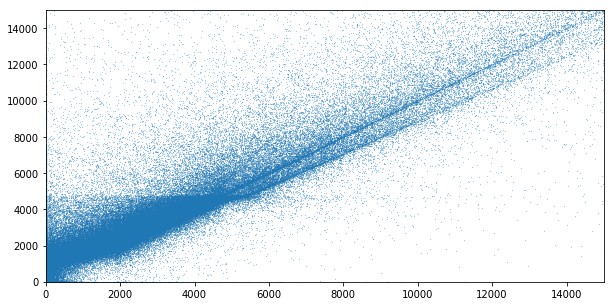

In [18]:
df_temp = df.query("(NBPAC_2011 ==0) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(361649, 253)


(0, 15000)

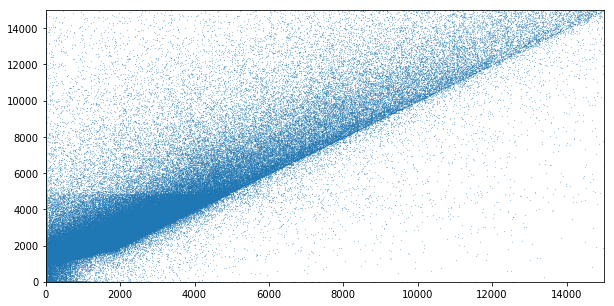

In [19]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(361649, 253)


(0, 15000)

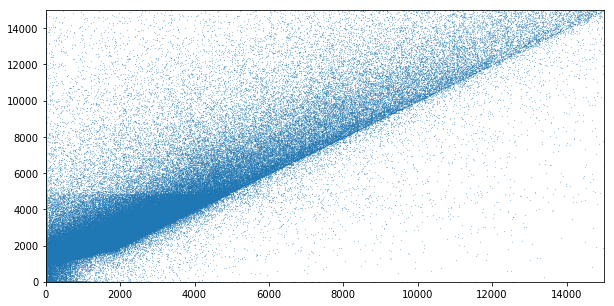

In [20]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

## Needed variables

In [21]:
nb_enf_max_for_annalysis = 6

In [22]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

In [23]:
child_bool_list = ["child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)]
cumulative_child_bool_list = ["cumulative_child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)] 

In [24]:
for child in range(0,7):
    df["child_{}".format(child)] = df.NBPAC_2011 == child

In [25]:
all_thresholds = pd.concat([threshold_byr_rbg["2011"], threshold_byr_rbg["2014"]]).sort_values()
thrsh_bool_list = ["Threshold_{}".format(thrsh) for thrsh in  all_thresholds ]

In [26]:
for thrsh in all_thresholds:
    df["Threshold_{}".format(thrsh)] = df.Rbg_2011>= thrsh

In [27]:
between_threshold_for_child_rank = ["Between_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
over_threshold_for_child_rank = ["Over_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
children_number =  ["child_{}".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]

interaction_child_between_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, between_threshold_for_child_rank)]
interaction_child_over_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, over_threshold_for_child_rank)]

In [28]:
for nb_enf in range(1,7): ### in modification
    df["Between_threshold_{}_child".format(nb_enf)
          ] = ((df.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
               & (df.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1]))


In [29]:

for nb_enf in range(1,7): ### in modification
    df["Over_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1])
for nb_enf in range(1,7): ### in modification
    df["Below_thresholds_{}_child".format(nb_enf)
          ] =  (df.Rbg_2014 < threshold_byr_rbg["2011"].iloc[nb_enf-1])

In [30]:
df["Over_threshold"] = False
df["Between_thresholds"] = False
for child in range(1,7): ### in modification
    df["Over_threshold"] +=  (df["Over_threshold_{}_child".format(child)] & (df["NBPAC_2011"] ==child))
    df["Between_thresholds"] +=  (df["Between_threshold_{}_child".format(child)] & (df["NBPAC_2011"] ==child))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [31]:
## Interactions hardcoded
for child in range(1,7):
    df["Over_{}_X_{}_child".format(child,child)] = df["Over_threshold_{}_child".format(child)] * df["child_{}".format(child)]
    df["Between_{}_X_{}_child".format(child,child)] = df["Between_threshold_{}_child".format(child)] * df["child_{}".format(child)]

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [32]:
hardcoded_over = ["Over_{}_X_{}_child".format(child,child) for child in range(1,7)]
hardcoded_between = ["Between_{}_X_{}_child".format(child,child) for child in range(1,7)]

In [33]:
df["Intercept"] = 1 
df["Rbg_splines"]  = pd.cut(df.Rbg_2011, 100)

In [34]:
threshold_byr_rbg

,2011,2014
0,63233,58291
1,73516,63530
2,94451,73806
3,115185,84103
4,135941,94368
5,150684,104633


In [36]:

brandwidth = 73516 - 63530
for nb_enf in range(1,7): ### in modification
    df["Above_2014_+_{}_euros".format(brandwidth)
          ] =  ((df.Rbg_2011 >= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2014"].iloc[nb_enf-1]+brandwidth))
    df["Below_2014_+_{}_euros".format(brandwidth)
          ] =  ((df.Rbg_2011 <= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2014"].iloc[nb_enf-1]+brandwidth))

### Income sample selection

In [37]:
df.shape

(806222, 328)

In [38]:
#Nouvelle version ou il faut appartenir à l'intervalle de revenu que sur un seule des deux années
df = df[((
            (df.Rbg_2011>50000)
            &(df.Rbg_2011<200000)
        )|(
            (df.Rbg_2014>50000)
            & (df.Rbg_2014<200000)))]

In [39]:
df.shape

(261244, 328)

In [40]:
df_save = df

In [41]:
df = df_save

In [42]:
df_save.shape

(261244, 328)

In [43]:
## On vire les variations extrèmes à 1%

In [44]:
low = 0.025
high = 0.975
quant_df = df.Delta_Rbg.quantile([low,high])
print(quant_df)
df = df[df.Delta_Rbg>quant_df.loc[low]]
df = df[df.Delta_Rbg<quant_df.loc[high]]

0.025   -42000.865
0.975    47940.245
Name: Delta_Rbg, dtype: float64


In [45]:
print(df.Rbg_2011.min())
print(df.Rbg_2014.min())
print(df.Rbg_2011.max())
print(df.Rbg_2014.max())


2772.0
8906.0
237328.0
245738.5


In [46]:
print((df.Rbg_2011<=1000).value_counts())
print((df.Rbg_2014<=1000).value_counts())

False    245117
Name: Rbg_2011, dtype: int64
False    245117
Name: Rbg_2014, dtype: int64


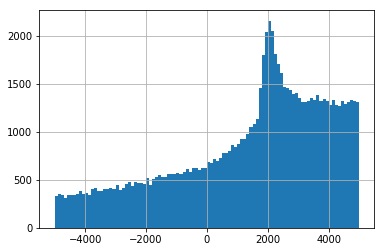

In [47]:
df.query("-5000<Delta_Rbg<5000").Delta_Rbg.hist(bins = 100)

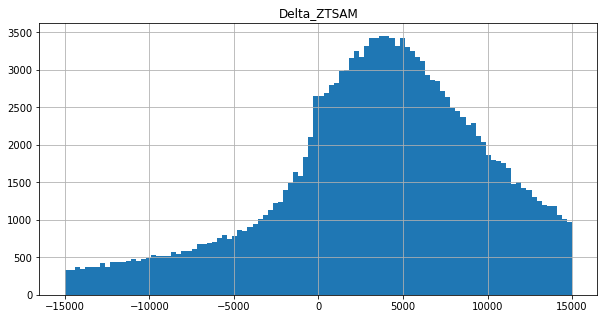

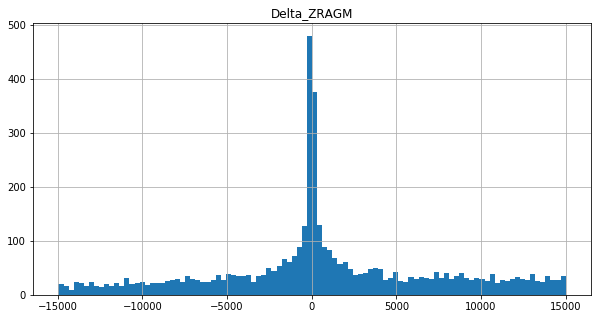

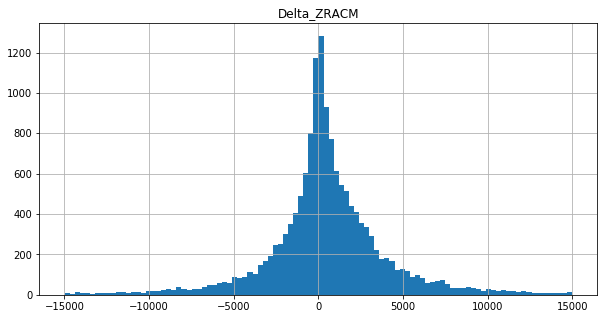

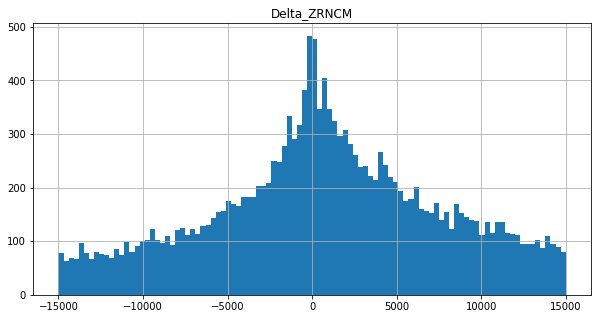

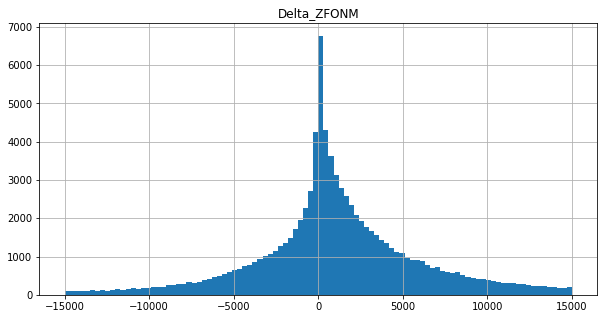

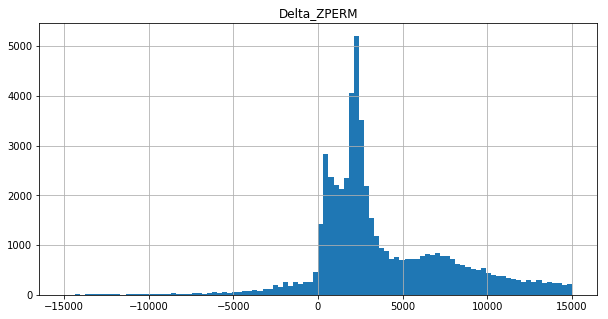

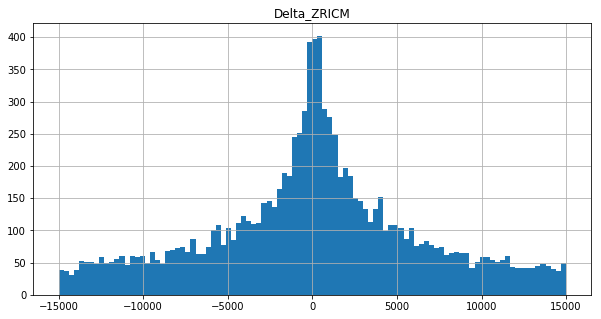

In [48]:
for var in household_income_vars:
    plt.figure(figsize=(10,5))
    df.query("(-15000<Delta_{}<15000) &(Delta_{}!=0)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
    plt.title("Delta_{}".format(var))

Text(0.5,1,'Delta_ZPERM')

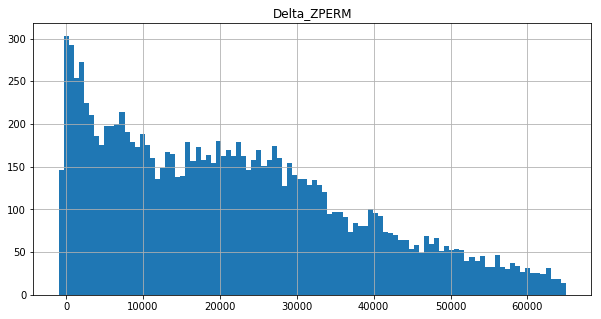

In [49]:
var = "ZPERM"
plt.figure(figsize=(10,5))
df.query("(-15000<Delta_{}<65000) &(Delta_{}!=0)&(ZPERM_2011<1000)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
plt.title("Delta_{}".format(var))

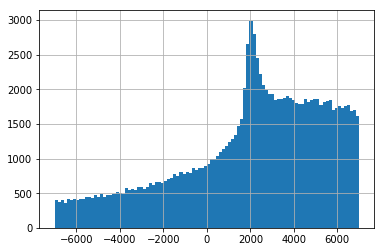

In [50]:
df.query("-7000<Delta_Rbg<7000").Delta_Rbg.hist(bins = 100)

In [51]:
(df.ZPERM_2014>0).value_counts(normalize = True)

False    0.71605
True     0.28395
Name: ZPERM_2014, dtype: float64

We have 28% of the sample that has retirement income. It creates a mass in the change in income at 2000 euros.

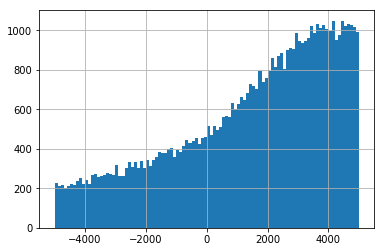

In [52]:
df.query("(-5000<Delta_Rbg<5000)&(ZPERM_2014<50)").Delta_Rbg.hist(bins = 100)

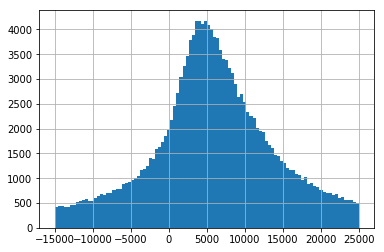

In [53]:
df.query("(-15000<Delta_Rbg<25000)&(ZPERM_2011<50)").Delta_Rbg.hist(bins = 100)

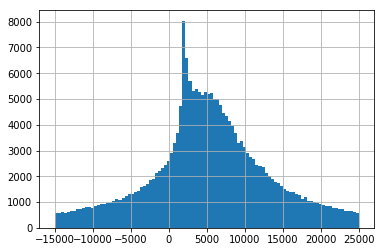

In [54]:
df.query("(-15000<Delta_Rbg<25000)").Delta_Rbg.hist(bins = 100)

In [55]:
(df.Rbg_2014==0).value_counts()

False    245117
Name: Rbg_2014, dtype: int64

In [56]:
df.query("NBPAC_2011<5").shape

(243634, 328)

In [57]:
df["Delta_NBPAC"] = df.NBPAC_2014 - df.NBPAC_2011

In [58]:
(df.Delta_NBPAC!=0).value_counts(normalize = True)

False    0.853654
True     0.146346
Name: Delta_NBPAC, dtype: float64

15% has experienced a birth or a child departure over the 2011,2014 period.  
We will focus our analysis only on households with a fixed family structure.

In [59]:
df.shape

(245117, 329)

In [60]:
df[df.NBPAC_2011 == df.NBPAC_2014].shape

(209245, 329)

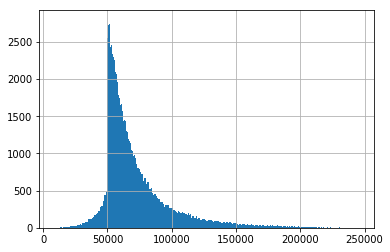

In [61]:
df.Rbg_2014.hist(bins = 900)

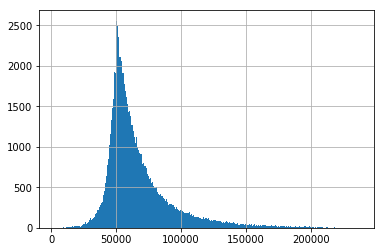

In [62]:

df.Rbg_2011.hist(bins = 900)

In [63]:
print((df.Rbg_2011 == 0).value_counts(normalize = True))
print((df.Rbg_2014 == 0).value_counts(normalize = True))

False    1.0
Name: Rbg_2011, dtype: float64
False    1.0
Name: Rbg_2014, dtype: float64


### Virer les papi mamies

In [64]:
print(((df.Age_mother>70)|(df.Age_father>70)).value_counts()) #on passe à 170894 au liey de 197728
#print ((df.Age_wo<75)&(df.Age_me<75)).value_counts()

False    227833
True      17284
dtype: int64


In [65]:
df = df[~((df.Age_mother>70)|(df.Age_father>70))]

In [66]:
df.shape

(227833, 329)

In [67]:
#df[["Age_mother", "Age_father"]]

In [68]:
#df = df[(df.Age_mother<70)&(df.Age_father<70)]

In [69]:
df.shape

(227833, 329)

In [70]:
range(nb_enf_max_for_annalysis+1)

range(0, 7)

In [71]:
%%time
df = df[df.NBPAC_2011.isin(range(nb_enf_max_for_annalysis+1))]#,6,7])]
#reg_df = reg_df[reg_df.AGERF_2011<50]

Wall time: 316 ms


In [72]:
df.shape

(226888, 329)

In [73]:
reg_df =df

In [74]:
import statsmodels.api as sm
reg_df["Rbg_splines"]  = pd.cut(reg_df.Rbg_2011, 10)

In [75]:
reg_df_same_NBPAC = reg_df[(reg_df.NBPAC_2011 == reg_df.NBPAC_2014)]

In [76]:
reg_df_same_NBPAC.AN_FISC_2011.head()

0     2012
2     2012
6     2012
9     2012
29    2012
Name: AN_FISC_2011, dtype: int64

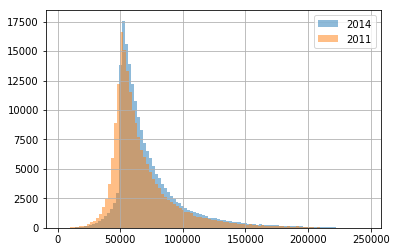

In [77]:
reg_df_same_NBPAC.Rbg_2014.hist(bins = 100, alpha = 0.5, label = "2014")
reg_df_same_NBPAC.Rbg_2011.hist(bins = 100,alpha = 0.5, label = "2011")
plt.legend()

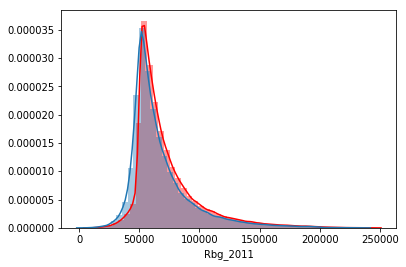

In [78]:
import seaborn as sns
sns.distplot(reg_df_same_NBPAC.Rbg_2014, color = "r")
sns.distplot(reg_df_same_NBPAC.Rbg_2011)

In [79]:
reg_df_same_NBPAC.query("NBPAC_2011==1").Over_threshold_1_child.value_counts()

False    15454
True     10317
Name: Over_threshold_1_child, dtype: int64

In [80]:
reg_df_same_NBPAC.query("NBPAC_2011==1").Over_threshold_1_child.value_counts()

False    15454
True     10317
Name: Over_threshold_1_child, dtype: int64

In [81]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])
threshold_byr_rbg.index = range(1,7); threshold_byr_rbg.index.name = 'nb_enf'
threshold_byr_rbg




reg_df_same_NBPAC["Not_touched_by_reform"] = (reg_df_same_NBPAC.NBPAC_2011 == 0).astype("int")
for nb_enf in range(1,7): ### in modification
    reg_df_same_NBPAC["Not_touched_by_reform".format(nb_enf)
          ] +=((reg_df_same_NBPAC.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])
                *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [82]:
reg_df_same_NBPAC["Distance_to_treatment_2"]  = 0
for child in range(1,7):
    reg_df_same_NBPAC["Distance_to_treatment_2"] += reg_df_same_NBPAC["Over_threshold_{}_child".format(child)] * reg_df_same_NBPAC[child_bool_list[child-1]] * ((threshold_byr_rbg["2011"].iloc[child-1]) - reg_df_same_NBPAC.Rbg_2014)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [83]:
reg_df_same_NBPAC.Not_touched_by_reform.value_counts()

1.0    136371
0.0     55280
Name: Not_touched_by_reform, dtype: int64

In [84]:
df_desc_stat = pd.DataFrame()

for child in  range(0, nb_enf_max_for_annalysis+1):
        df_desc_stat.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Not_touched_by_reform".format(child)].value_counts()[True]


for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Over_threshold_{}_child".format(child)].value_counts()[True]
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)
df_desc_stat.loc["Total"] = df_desc_stat.sum(axis = 0)

In [85]:
df_desc_stat

,Treatment_0,Treatment_1,Treatment_2,Total
0,51284.0,NaN,NaN,51284.0
1,12600.0,2854.0,10317.0,25771.0
2,46301.0,10798.0,19582.0,76681.0
3,21906.0,4882.0,5217.0,32005.0
4,3535.0,798.0,645.0,4978.0
5,583.0,120.0,42.0,745.0
6,162.0,20.0,5.0,187.0
Total,136371.0,19472.0,35808.0,191651.0


#### Still in the same treatment span

In [86]:

reg_df_same_NBPAC["Rbg2014_below_threshold_{}_child".format(0)
          ] =  True
for nb_enf in range(1,7): ### in modification
    reg_df_same_NBPAC["Rbg2014_Over_threshold_{}_child".format(nb_enf)
          ] =  (reg_df_same_NBPAC.Rbg_2014 > threshold_byr_rbg["2011"].iloc[nb_enf-1])
    reg_df_same_NBPAC["Rbg2014_Between_threshold_{}_child".format(nb_enf)
          ] =  (reg_df_same_NBPAC.Rbg_2014 > threshold_byr_rbg["2014"].iloc[nb_enf-1]) & (reg_df_same_NBPAC.Rbg_2014 < threshold_byr_rbg["2011"].iloc[nb_enf-1])
    reg_df_same_NBPAC["Rbg2014_below_threshold_{}_child".format(nb_enf)
          ] =  (reg_df_same_NBPAC.Rbg_2014 < threshold_byr_rbg["2014"].iloc[nb_enf-1])



C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:8: S

In [87]:
df_desc_stat_2014 = pd.DataFrame()

for child in  [0]:
        df_desc_stat_2014.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat_2014.loc[child, "Treatment_1"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat_2014.loc[child, "Treatment_2"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat_2014.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
    
df_desc_stat_2014["Total"] = df_desc_stat_2014.sum(axis = 1)

#### Transitions 

In [88]:
df_desc_stat = pd.DataFrame()

for child in  [0]:
    df_desc_stat.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)

In [89]:
df_desc_stat

,Treatment_0,Treatment_1,Treatment_2,Total
0,51284.0,NaN,NaN,51284.0
1,9717.0,3336.0,12718.0,25771.0
2,37268.0,13661.0,25750.0,76679.0
3,19026.0,6171.0,6808.0,32005.0
4,3197.0,966.0,815.0,4978.0
5,552.0,137.0,56.0,745.0
6,150.0,29.0,8.0,187.0


In [90]:
df_temp_transition =reg_df_same_NBPAC

In [91]:
df_temp_transition["Treatment_0_2014"] = False * reg_df_same_NBPAC.shape[0]
df_temp_transition["Treatment_0_2011"] = False * reg_df_same_NBPAC.shape[0]


df_temp_transition["Treatment_1_2014"] = False * reg_df_same_NBPAC.shape[0]
df_temp_transition["Treatment_1_2011"] = False * reg_df_same_NBPAC.shape[0]

df_temp_transition["Treatment_2_2014"] = False * reg_df_same_NBPAC.shape[0]
df_temp_transition["Treatment_2_2011"] = False * reg_df_same_NBPAC.shape[0]



for child in range(1,7):
    df_temp_transition["Treatment_1_2014"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Rbg2014_Between_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_1_2011"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Between_threshold_{}_child".format(child)]
    
    df_temp_transition["Treatment_2_2014"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Rbg2014_Over_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_2_2011"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Over_threshold_{}_child".format(child)]
    



df_temp_transition["Treatment_1_2011"] = df_temp_transition["Treatment_1_2011"].astype("bool")
df_temp_transition["Treatment_2_2011"] = df_temp_transition["Treatment_2_2011"].astype("bool")
df_temp_transition["Treatment_1_2014"] = df_temp_transition["Treatment_1_2014"].astype("bool")
df_temp_transition["Treatment_2_2014"] = df_temp_transition["Treatment_2_2014"].astype("bool")
df_temp_transition["Treatment_0_2011"] = ~(df_temp_transition.Treatment_1_2011 |df_temp_transition.Treatment_2_2011)
df_temp_transition["Treatment_0_2014"] = ~(df_temp_transition.Treatment_1_2014 |df_temp_transition.Treatment_2_2014)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

In [92]:
df_temp_transition.Treatment_0_2011.value_counts()

True     136371
False     55280
Name: Treatment_0_2011, dtype: int64

In [93]:
df_temp_transition.shape

(191651, 355)

In [94]:

print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print("*"*12)
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])

7452
32293
116478
************
8821
1996
************
14852
5041
3199
1519


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [95]:

print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])

0.0388831782772
0.168498990352
0.607760982202
************
0.0460263708512
0.0104147643373
************
0.0774950300285
0.0263030195512
0.0166917991558
0.00792586524464


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [96]:
df_desc_transition = pd.DataFrame()
df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]


display(df_desc_transition)
display(df_desc_transition/df_temp_transition.shape[0])




C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,116478.0,14852.0,5041.0
Treatment_1,3199.0,7452.0,8821.0
Treatment_2,1519.0,1996.0,32293.0


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.607761,0.077495,0.026303
Treatment_1,0.016692,0.038883,0.046026
Treatment_2,0.007926,0.010415,0.168499


In [97]:
for nb_child in range(0,7):
    df_desc_transition = pd.DataFrame()
    df_temp = df_temp_transition.query("(NBPAC_2011==NBPAC_2014)& (NBPAC_2011 ==@nb_child)")
    df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_2_2014).sum(axis=0)

    print("*"*9+"{} child".format(nb_child)+"*"*9)
    print("Headcount")
    display(df_desc_transition)
    print("Share")
    display(df_desc_transition/df_temp.shape[0])




*********0 child*********
Headcount


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,51284.0,0.0,0.0
Treatment_1,0.0,0.0,0.0
Treatment_2,0.0,0.0,0.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,1.0,0.0,0.0
Treatment_1,0.0,0.0,0.0
Treatment_2,0.0,0.0,0.0


*********1 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,8431.0,2303.0,1866.0
Treatment_1,608.0,612.0,1634.0
Treatment_2,678.0,421.0,9218.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.327151,0.089364,0.072407
Treatment_1,0.023592,0.023748,0.063405
Treatment_2,0.026309,0.016336,0.357689


*********2 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,34726.0,8761.0,2814.0
Treatment_1,1783.0,3794.0,5221.0
Treatment_2,761.0,1106.0,17715.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.452863,0.114253,0.036697
Treatment_1,0.023252,0.049478,0.068087
Treatment_2,0.009924,0.014423,0.231022


*********3 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,18277.0,3281.0,348.0
Treatment_1,672.0,2495.0,1715.0
Treatment_2,77.0,395.0,4745.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.571067,0.102515,0.010873
Treatment_1,0.020997,0.077957,0.053585
Treatment_2,0.002406,0.012342,0.148258


*********4 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,3084.0,438.0,13.0
Treatment_1,110.0,457.0,231.0
Treatment_2,3.0,71.0,571.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.619526,0.087987,0.002611
Treatment_1,0.022097,0.091804,0.046404
Treatment_2,0.000603,0.014263,0.114705


*********5 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,529.0,54.0,0.0
Treatment_1,23.0,81.0,16.0
Treatment_2,0.0,2.0,40.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.710067,0.072483,0.000000
Treatment_1,0.030872,0.108725,0.021477
Treatment_2,0.000000,0.002685,0.053691


*********6 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,147.0,15.0,0.0
Treatment_1,3.0,13.0,4.0
Treatment_2,0.0,1.0,4.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.786096,0.080214,0.00000
Treatment_1,0.016043,0.069519,0.02139
Treatment_2,0.000000,0.005348,0.02139


In [98]:
#Transitions by number of children.
# for child in range(1,7): 
#     print  "*"*22 + "{}".format(child)
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2014).value_counts()[1]
#     print"*"*12
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2014).value_counts()[1]
#     print"*"*12
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2014).value_counts()[1]

In [99]:
((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014)
                                               +(df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014)
                                               +(df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014)).value_counts(normalize = True)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


True     0.815143
False    0.184857
dtype: float64

In [100]:
reg_df_same_NBPAC["Stays_in_same_treatment"]= ((df_temp_transition.Treatment_0_2011 & df_temp_transition.Treatment_0_2014)
                                               +(df_temp_transition.Treatment_1_2011 & df_temp_transition.Treatment_1_2014)
                                               +(df_temp_transition.Treatment_2_2011 & df_temp_transition.Treatment_2_2014))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
df["Stays_in_same_treatment"]= ((df_temp_transition.Treatment_0_2011 & df_temp_transition.Treatment_0_2014)
                                               +(df_temp_transition.Treatment_1_2011 & df_temp_transition.Treatment_1_2014)
                                               +(df_temp_transition.Treatment_2_2011 & df_temp_transition.Treatment_2_2014))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [102]:
reg_df_same_NBPAC[["NBPAC_2011","Rbg_2011","Treatment_0_2011", "Rbg_2014","Treatment_0_2014"]].head()

,NBPAC_2011,Rbg_2011,Treatment_0_2011,Rbg_2014,Treatment_0_2014
0,3.0,43567.4,True,54073.8,True
2,1.0,47919.6,True,50767.2,True
6,3.0,41512.5,True,57008.7,True
9,2.0,98984.1,False,99911.7,False
29,0.0,51969.6,True,50971.5,True


In [103]:
print(reg_df_same_NBPAC.Stays_in_same_treatment.value_counts(normalize = True))
print(reg_df_same_NBPAC.query("NBPAC_2011>0").Stays_in_same_treatment.value_counts(normalize = True))
print(reg_df_same_NBPAC[~reg_df_same_NBPAC.Treatment_0_2011].Stays_in_same_treatment.value_counts(normalize = True))

True     0.815143
False    0.184857
Name: Stays_in_same_treatment, dtype: float64
True     0.747604
False    0.252396
Name: Stays_in_same_treatment, dtype: float64
True     0.718976
False    0.281024
Name: Stays_in_same_treatment, dtype: float64


In [104]:
threshold_byr_rbg

,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [105]:
#df_hello[(df_hello.Treatment_0_2011 * df_hello.Treatment_0_2014) ==1][["Rbg_2011", "Rbg_2014", "NBPAC_2011"]].value_counts()

In [106]:
pd.crosstab(reg_df_same_NBPAC["NBPAC_2011"], reg_df_same_NBPAC["Rbg2014_Between_threshold_1_child"])

Rbg2014_Between_threshold_1_child,False,True
NBPAC_2011,,
0.0,44642,6642
1.0,22435,3336
2.0,66690,9991
3.0,28340,3665
4.0,4459,519
5.0,686,59
6.0,170,17


In [107]:
#reg_df_same_NBPAC[["Age_Elder_child","Age_Youngest_child"]]

### Common trend assumption

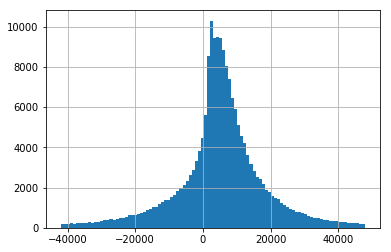

In [108]:
reg_df_same_NBPAC.query("-50000<Delta_Rbg<50000").Delta_Rbg.hist(bins = 100)

In [109]:
import seaborn as sns

We see that there is something not very smoooth happenning for households without children:

(-10000, 20000)

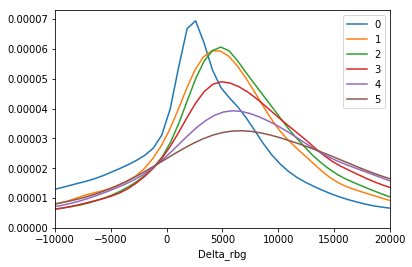

In [110]:
for child in range(0,6):
    sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [111]:
reg_df_same_NBPAC.shape

(191651, 356)

In [112]:

reg_df_same_NBPAC = reg_df_same_NBPAC.query("(ZPERM_2014==0)&(ZPERM_2011==0)")

In [113]:
reg_df_same_NBPAC.shape

(143589, 356)

When getting rid of households with an income tax equal to 0 in 2014, the curve is a lot smoother.
The average change in taxable income is way nearer to the average change for one children than the one we observe when we take out the households which does not have retirement income.

(-10000, 20000)

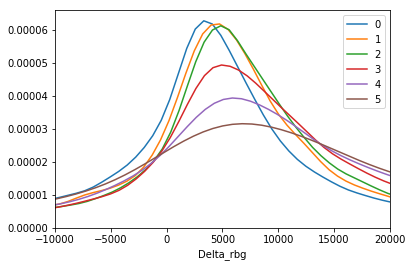

In [114]:
for child in range(0,6):
    sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2014==0)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [115]:
threshold_byr_rbg

,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [116]:
for child in range(0,7):
    reg_df["child_{}".format(child)] = reg_df.NBPAC_2011 == child

In [117]:
print(reg_df.query("NBPAC_2011==0").Delta_Rbg.mean())
print(reg_df.query("child_1==True").Delta_Rbg.mean())
print(reg_df.query("child_2==True").Delta_Rbg.mean())
print(reg_df.query("child_3==True").Delta_Rbg.mean())
print(reg_df.query("child_4==True").Delta_Rbg.mean())
print(reg_df.query("child_5==True").Delta_Rbg.mean())
print(reg_df.query("child_6==True").Delta_Rbg.mean())

1906.1398182974472
4487.379322171669
6116.632047383495
7035.465563598714
7330.8906694359985
6951.198694029861
7188.350530035336


In [118]:

print(reg_df.query("(Between_threshold_1_child==True)").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_2_child==True").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_3_child==True").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_4_child==True").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_5_child==True").Delta_Rbg.mean())

2864.9662740463214
3004.7578092996664
3252.281193433621
3551.4889816872246
3729.5014832949555


In [119]:
# print reg_df.query("(Between_threshold_1_child==True)&(child_1==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_2==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_3==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_4==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_5==True)").Delta_rbg.mean()

In [120]:
# print reg_df.query("(Between_threshold_2_child==True)&(child_1==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_2==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_3==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_4==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_5==True)").Delta_rbg.mean()

In [121]:
reg_df_same_NBPAC["child_0"] = reg_df.NBPAC_2011==0

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
# for nb_child1 in range(1,7):
#     print reg_df_same_NBPAC.query("(child_{}==True)&(Between_threshold_2_child==True) ".format(nb_child1)).shape[0]


In [123]:
# for nb_child1 in range(1,7):
#     for nb_child2 in range(0,7):
#         print(nb_child1, nb_child2,reg_df_same_NBPAC.query("(Between_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.mean(),
#              reg_df_same_NBPAC.query("(Between_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.shape[0])



In [124]:
reg_df_same_NBPAC_delta_trimmed = reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)")

In [125]:
# for nb_child1 in range(1,6):
#     for nb_child2 in range(0,6):
#         print nb_child1, nb_child2,reg_df_same_NBPAC_delta_trimmed.query("(Between_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.mean()



In [126]:
# for nb_child1 in range(1,6):
#     for nb_child2 in range(0,6):
#         print nb_child1, nb_child2,reg_df_same_NBPAC_delta_trimmed.query("(Over_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.mean()



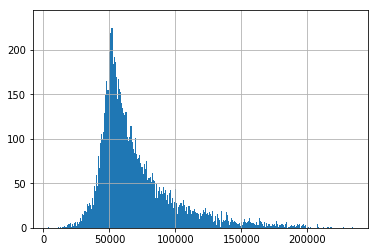

In [127]:
reg_df_same_NBPAC.query("NBPAC_2011==3").Rbg_2011.hist(bins = 1000)


### Do households bunch ?

In 2011 ?

(62000, 64000)

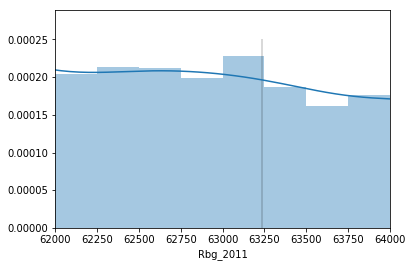

In [128]:
nb_enf = 1
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (60000<Rbg_2011<65000)".format(nb_enf)).Rbg_2011, hist = True, bins = 20)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(62000,64000)

(56000, 60000)

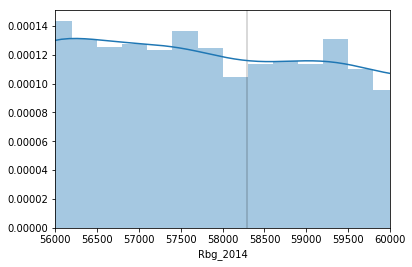

In [129]:
nb_enf = 1
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (55000<Rbg_2014<64000)".format(nb_enf)).Rbg_2014, hist = True, bins = 30)
plt.vlines(threshold_byr_rbg["2014"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(56000,60000)

(54000, 62000)

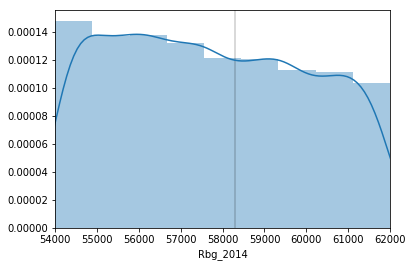

In [130]:
nb_enf = 1
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2014=={}) & (54000<Rbg_2014<62000)".format(nb_enf)).Rbg_2014, hist = True, bins = 9)
plt.vlines(threshold_byr_rbg["2014"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(54000,62000)

(5e-05, 0.00015)

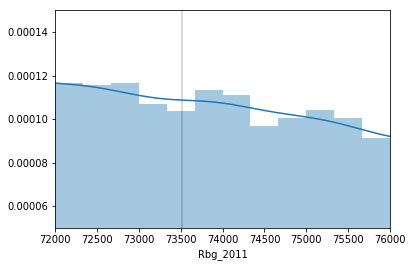

In [131]:
nb_enf = 2
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (70000<Rbg_2011<80000)".format(nb_enf)).Rbg_2011, hist = True, bins = 30)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(72000,76000)
plt.ylim(0.00005, 0.00015)

(90000, 100000)

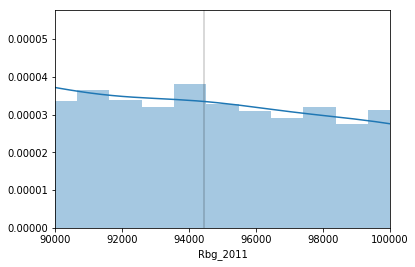

In [132]:
nb_enf = 3
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (80000<Rbg_2011<110000)".format(nb_enf)).Rbg_2011, hist = True, bins = 31)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(90000,100000)
#plt.ylim(0.00005, 0.00015)

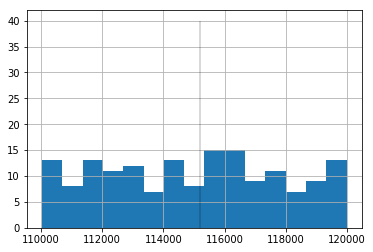

In [133]:
nb_enf = 4
reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (110000<Rbg_2011<120000)".format(nb_enf)).Rbg_2011.hist(bins = 15)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,40, alpha = 0.2 )
#plt.xlim(90000,100000)
#plt.ylim(0.00005, 0.00015)

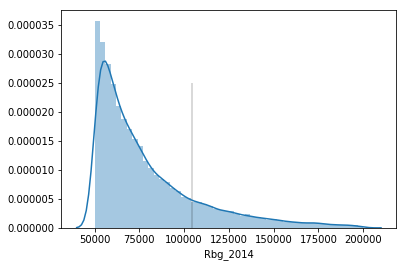

In [134]:
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2014==3) & (50000<Rbg_2014<200000)").Rbg_2014)
plt.vlines(threshold_byr_rbg["2014"][6],0,0.000025, alpha = 0.2 )

In [135]:
threshold_byr_rbg["2011"][3]

94451

In [136]:
(df_temp.NBPAC_2011==2).value_counts()

False    187
Name: NBPAC_2011, dtype: int64

In [137]:
(df_temp.query("NBPAC_2011==2")).shape

(0, 355)

In [137]:
df_temp.query("NBPAC_2011 == {}".format(child)).shape

(187, 353)

In [138]:
>RDD

SyntaxError: invalid syntax (<ipython-input-138-470c48a12f91>, line 1)

In [145]:

brandwidth = 73516 - 63530
df["Above_2014_plus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df["Above_2014_plus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 >= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2014"].iloc[nb_enf-1]+brandwidth))
    df["Below_2014_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2014"].iloc[nb_enf-1]-brandwidth))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [166]:

brandwidth = 73516 - 63530
df["Above_2014_plus_{}_euros".format(brandwidth)] = False
df["Below_2014_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2014_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2014"].iloc[nb_enf-1]+brandwidth))
    
    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2014_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2014"].iloc[nb_enf-1]-brandwidth))

In [216]:

brandwidth = 73516 - 63530
df["Above_2011_plus_{}_euros".format(brandwidth)] = False
df["Below_2011_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2011_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2011"].iloc[nb_enf-1]+brandwidth))
    
    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2011_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1]-brandwidth))

In [208]:
df.Above_2014_plus_9986_euros.value_counts(dropna = False)

0    182616
1     22629
Name: Above_2014_plus_9986_euros, dtype: int64

In [209]:
df.Below_2014_minus_9986_euros.value_counts(dropna = False)

0    168238
1     37007
Name: Below_2014_minus_9986_euros, dtype: int64

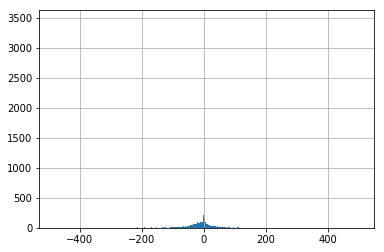

In [182]:
(df.ZIMPOM_2011 - df.Irpp_2011)[np.abs((df.ZIMPOM_2011 - df.Irpp_2011)/df.ZIMPOM_2011)<.01].hist(bins = 1000)

In [185]:
impot_sur.value_counts()

False    172373
True      54515
dtype: int64

In [203]:
df = df[df.ZIMPOM_2011>50]

(array([  2.05794000e+05,   1.00000000e+01,   6.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

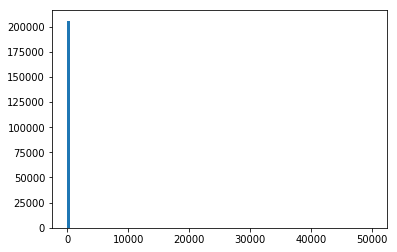

In [201]:
plt.hist(np.sort(np.abs(((df.ZIMPOM_2011 - df.Irpp_2011)/df.ZIMPOM_2011))), bins = 100)

In [205]:
np.abs((df.ZIMPOM_2011 - df.Irpp_2011)/df.ZIMPOM_2011)

0          0.300176
9          0.691910
18         4.706580
29         0.466973
31         0.002488
33         0.822335
52         0.928068
54         2.569064
56         3.003957
57         0.283049
58         2.502532
60         0.204504
61         0.096976
70         0.000109
73         0.115654
76         0.112016
79         0.015579
84         0.007039
85         0.000076
87         0.319872
88         0.134062
98         9.283932
100        0.099874
101        0.205710
109       11.851266
111        0.225296
116        0.235004
127        0.165319
137        0.016056
144        0.034039
            ...    
806099     2.317858
806102     0.028188
806109     2.082777
806111     0.099393
806113     0.101383
806115     0.000013
806117     2.446275
806118     1.520480
806119     0.228412
806125     0.725311
806127     0.023600
806131     0.057371
806133     0.171919
806139     0.767050
806147     1.054774
806148     0.096178
806154     1.464078
806157     0.066318
806163     0.248309


In [240]:
del child

In [254]:

nb_child = 2
brandwidth = 10000
df["Above_2014_plus_{}_euros".format(brandwidth)] = False
df["Below_2014_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2014_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2014"].iloc[nb_enf-1]+brandwidth))
    
    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2014_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2014"].iloc[nb_enf-1]-brandwidth))







impot_sur = np.abs((df.ZIMPOM_2011 - df.Irpp_2011)/df.Irpp_2011)<.7
df["impot_sur"] = impot_sur
df_temp = df.query("(Above_2014_plus_{}_euros==1) | (Below_2014_minus_{}_euros==1)".format(brandwidth, brandwidth))

m = sm.OLS.from_formula("(Delta_rbg)~ Above_2014_plus_{}_euros".format(brandwidth, brandwidth)
                        , df_temp.query("NBPAC_2011 == @nb_child"))
fit = m.fit()
summary = fit.summary(); print(summary)



    
    
    
df["Above_2011_plus_{}_euros".format(brandwidth)] = False
df["Below_2011_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2011_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2011"].iloc[nb_enf-1]+brandwidth))
    
    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2011_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1]-brandwidth))



impot_sur = np.abs((df.ZIMPOM_2011 - df.Irpp_2011)/df.Irpp_2011)<.7
df["impot_sur"] = impot_sur
df_temp = df.query("(Above_2011_plus_{}_euros==1) | (Below_2011_minus_{}_euros==1)".format(brandwidth, brandwidth))

m = sm.OLS.from_formula("(Delta_rbg)~ Above_2011_plus_{}_euros".format(brandwidth, brandwidth)
                        , df_temp.query("NBPAC_2011 == @nb_child"))
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.53
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           0.000685
Time:                        17:04:56   Log-Likelihood:            -3.4267e+05
No. Observations:               32014   AIC:                         6.853e+05
Df Residuals:                   32012   BIC:                         6.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [265]:
result_fit_list = list()
brandwidth = 10000


df["Above_2011_plus_{}_euros".format(brandwidth)] = False
df["Below_2011_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2011_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2011"].iloc[nb_enf-1]+brandwidth))

    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2011_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1]-brandwidth))
    
df["Above_2014_plus_{}_euros".format(brandwidth)] = False
df["Below_2014_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2014_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2014"].iloc[nb_enf-1]+brandwidth))

    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2014_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2014"].iloc[nb_enf-1]-brandwidth))
for nb_child in range(1,7):








    impot_sur = np.abs((df.ZIMPOM_2011 - df.Irpp_2011)/df.Irpp_2011)<.7
    df["impot_sur"] = impot_sur
    df_temp = df.query("(Above_2014_plus_{}_euros==1) | (Below_2014_minus_{}_euros==1)".format(brandwidth, brandwidth))

    m = sm.OLS.from_formula("(Delta_rbg)~ Above_2014_plus_{}_euros".format(brandwidth, brandwidth)
                            , df_temp.query("NBPAC_2011 == @nb_child"))
    fit = m.fit()
    result_fit_list.append(fit)









    df_temp = df.query("(Above_2011_plus_{}_euros==1) | (Below_2011_minus_{}_euros==1)".format(brandwidth, brandwidth))

    m = sm.OLS.from_formula("(Delta_rbg)~ Above_2011_plus_{}_euros".format(brandwidth, brandwidth)
                            , df_temp.query("NBPAC_2011 == @nb_child"))
    fit = m.fit()
    result_fit_list.append(fit)

In [266]:
summary_col_result = summary_col(result_fit_list, stars = True,  info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}); summary_col_result

,Delta_rbg I,Delta_rbg II,Delta_rbg III,Delta_rbg IIII,Delta_rbg IIIII,Delta_rbg IIIIII,Delta_rbg IIIIIII,Delta_rbg IIIIIIII,Delta_rbg IIIIIIIII,Delta_rbg IIIIIIIIII,Delta_rbg IIIIIIIIIII,Delta_rbg IIIIIIIIIIII
Above_2011_plus_10000_euros[T.1],,-143.0408,,46.8014,,-33.7877,,-1726.2574,,11718.9452*,,17719.5150
,,(183.6416),,(188.7451),,(552.1542),,(1838.1921),,(5947.2900),,(18117.2858)
Above_2014_plus_10000_euros[T.1],-846.2284***,,423.9493***,,-20.0668,,1378.7422,,-1008.9711,,3517.6111,
,(149.1754),,(124.8454),,(311.9379),,(1062.0890),,(3591.1817),,(9970.9720),
Intercept,3110.8642***,2452.4662***,3987.6929***,4412.5608***,5365.6637***,5980.8527***,4906.9716***,6543.2793***,5931.2200**,-4610.3500,2111.1333,-9846.6400
,(92.8943),(111.7539),(75.7409),(116.4130),(197.3335),(358.1646),(686.7832),(1218.6343),(2437.7335),(4062.7725),(7723.4817),(12078.1906)
adjusted-R2,0.16%,-0.00%,0.03%,-0.00%,-0.01%,-0.03%,0.09%,-0.03%,-0.92%,6.15%,-6.67%,-0.55%
N,19408,15616,32014,19040,7399,3534,794,405,102,45,15,9


### Pooled

In [271]:
import seaborn as sns

In [283]:
df["Above_2011_plus_{}_euros".format(brandwidth)] = False
df["Below_2011_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2011_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2011"].iloc[nb_enf-1]+brandwidth))
    
    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2011_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1]-brandwidth))

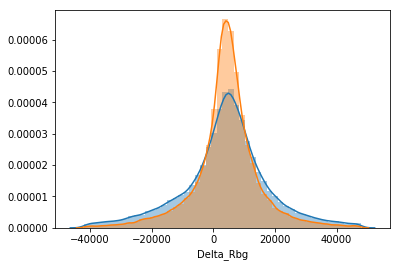

In [285]:
sns.distplot(df[df["Above_2011_plus_{}_euros".format(brandwidth)]==True].Delta_Rbg)
sns.distplot(df[df["Below_2011_minus_{}_euros".format(brandwidth)]==True].Delta_Rbg)

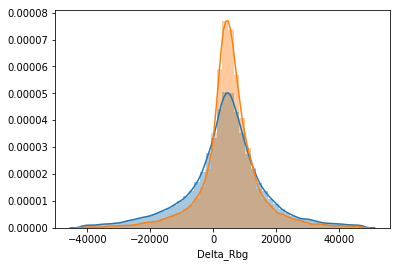

In [288]:
sns.distplot(df[df["Above_2014_plus_{}_euros".format(brandwidth)]==True].Delta_Rbg, norm_hist = True)
sns.distplot(df[df["Below_2014_minus_{}_euros".format(brandwidth)]==True].Delta_Rbg,  norm_hist = True)

In [306]:
threshold_byr_rbg

,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [307]:
threshold_byr_rbg["2011"].iloc[1-1]

63233

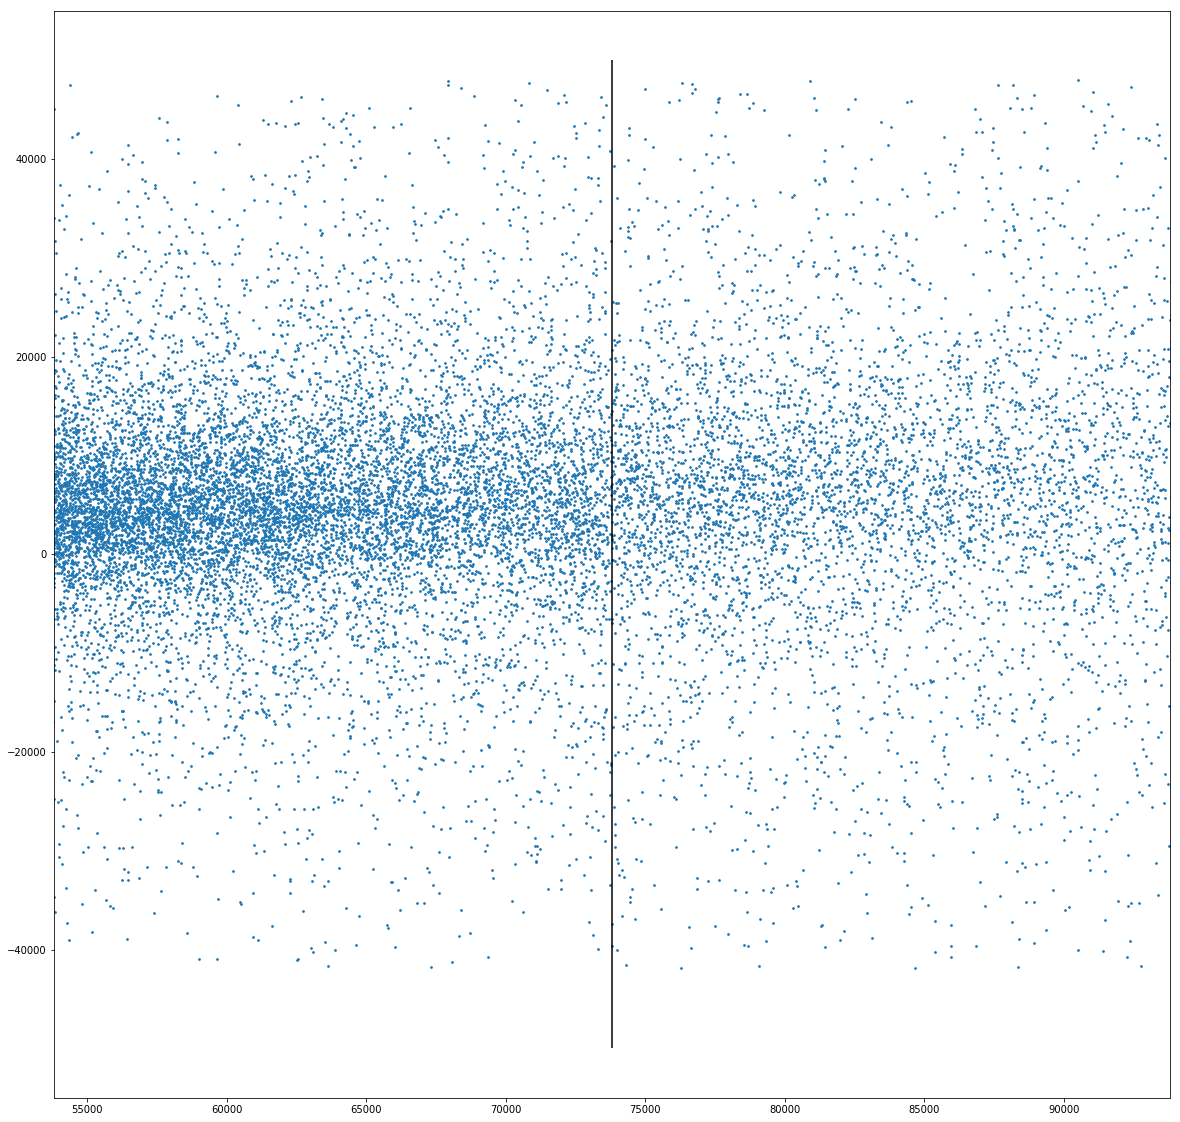

In [316]:
plt.figure(figsize=(20,20))
nb_enf = 3
df_temp = df.query("NBPAC_2011 == @nb_enf")
plt.scatter(df_temp.Rbg_2011,df_temp.Delta_Rbg, s = 2.9)
plt.xlim(threshold_byr_rbg["2014"].iloc[nb_enf-1]-20000, threshold_byr_rbg["2014"].iloc[nb_enf-1]+20000)
plt.vlines(threshold_byr_rbg["2014"].iloc[nb_enf-1],-50000,50000)

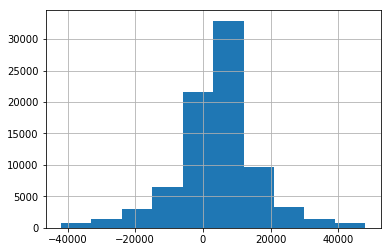

In [270]:
df_temp.Delta_Rbg.hist()

In [269]:





df["Above_2011_plus_{}_euros".format(brandwidth)] = False
df["Below_2011_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2011_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2011"].iloc[nb_enf-1]+brandwidth))
    
    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2011_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1]-brandwidth))



df_temp = df.query("(Above_2014_plus_{}_euros==1) | (Below_2014_minus_{}_euros==1)".format(brandwidth, brandwidth))

m = sm.OLS.from_formula("(Delta_rbg)~ Above_2014_plus_{}_euros".format(brandwidth, brandwidth)
                        , df_temp.query("NBPAC_2011 >0"))
fit = m.fit()
summary = fit.summary(); print(summary)

df_temp = df.query("(Above_2011_plus_{}_euros==1) | (Below_2011_minus_{}_euros==1)".format(brandwidth, brandwidth))

m = sm.OLS.from_formula("(Delta_rbg)~ Above_2011_plus_{}_euros".format(brandwidth, brandwidth)
                        , df_temp.query("NBPAC_2011 >0"))
fit = m.fit()
summary = fit.summary(); print(summary)





                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           8.17e-64
Time:                        17:43:34   Log-Likelihood:            -1.1436e+06
No. Observations:              106782   AIC:                         2.287e+06
Df Residuals:                  106780   BIC:                         2.287e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [268]:
brandwidth = 20000


df["Above_2011_plus_{}_euros".format(brandwidth)] = False
df["Below_2011_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2011_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2011"].iloc[nb_enf-1]+brandwidth))
    
    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2011_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1]-brandwidth))



df_temp = df.query("(Above_2014_plus_{}_euros==1) | (Below_2014_minus_{}_euros==1)".format(brandwidth, brandwidth))

m = sm.OLS.from_formula("(Delta_rbg)~ Above_2014_plus_{}_euros:C(NBPAC_2011)".format(brandwidth, brandwidth)
                        , df_temp.query("NBPAC_2011 >0"))
fit = m.fit()
summary = fit.summary(); print(summary)

df_temp = df.query("(Above_2011_plus_{}_euros==1) | (Below_2011_minus_{}_euros==1)".format(brandwidth, brandwidth))

m = sm.OLS.from_formula("(Delta_rbg)~ Above_2011_plus_{}_euros:C(NBPAC_2011)".format(brandwidth, brandwidth)
                        , df_temp.query("NBPAC_2011 >0"))
fit = m.fit()
summary = fit.summary(); print(summary)





                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     62.42
Date:                Thu, 22 Nov 2018   Prob (F-statistic):          1.14e-139
Time:                        17:25:50   Log-Likelihood:            -1.1434e+06
No. Observations:              106782   AIC:                         2.287e+06
Df Residuals:                  106770   BIC:                         2.287e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [239]:
threshold_byr_rbg


,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [227]:


brandwidth = 10000
df["Above_2014_plus_{}_euros".format(brandwidth)] = False
df["Below_2014_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2014_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2014"].iloc[nb_enf-1]+brandwidth))
    
    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2014_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2014"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2014"].iloc[nb_enf-1]-brandwidth))







impot_sur = np.abs((df.ZIMPOM_2011 - df.Irpp_2011)/df.Irpp_2011)<.7
df["impot_sur"] = impot_sur
df_temp = df.query("(Above_2014_plus_{}_euros==1) | (Below_2014_minus_{}_euros==1)".format(brandwidth, brandwidth))
for child in range(1,2):
    print(child)
    m = sm.OLS.from_formula("(Delta_rbg)~ Above_2014_plus_{}_euros".format(brandwidth, brandwidth)
                            , df_temp.query("NBPAC_2011 > 0"))
    fit = m.fit()
    summary = fit.summary(); print(summary)
    


    
    
    
df["Above_2011_plus_{}_euros".format(brandwidth)] = False
df["Below_2011_minus_{}_euros".format(brandwidth)] = False
for nb_enf in range(1,7): ### in modification
    df.loc[df.NBPAC_2011==nb_enf,
           "Above_2011_plus_{}_euros".format(brandwidth)
          ] += ((df.Rbg_2011 >= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 < threshold_byr_rbg["2011"].iloc[nb_enf-1]+brandwidth))
    
    df.loc[df.NBPAC_2011==nb_enf,
        "Below_2011_minus_{}_euros".format(brandwidth)
          ] +=  ((df.Rbg_2011 <= threshold_byr_rbg["2011"].iloc[nb_enf-1])
                &(df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1]-brandwidth))



impot_sur = np.abs((df.ZIMPOM_2011 - df.Irpp_2011)/df.Irpp_2011)<.7
df["impot_sur"] = impot_sur
df_temp = df.query("(Above_2011_plus_{}_euros==1) | (Below_2011_minus_{}_euros==1)".format(brandwidth, brandwidth))
for child in range(1,2):
    print(child)
    m = sm.OLS.from_formula("(Delta_rbg)~ Above_2011_plus_{}_euros".format(brandwidth, brandwidth)
                            , df_temp.query("NBPAC_2011 > 0"))
    fit = m.fit()
    summary = fit.summary(); print(summary)

1
                    Robust linear Model Regression Results                    
Dep. Variable:              Delta_rbg   No. Observations:                38649
Model:                            RLM   Df Residuals:                    38647
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 22 Nov 2018                                         
Time:                        16:26:47                                         
No. Iterations:                     8                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Interc